In [2]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from wpca import PCA
from sklearn.decomposition import PCA as sklearnPCA
import seaborn
from sklearn import preprocessing

In [4]:
#Load movie names and movie ratings
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [6]:
ratings.drop(['timestamp'], axis=1, inplace=True)

In [7]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)

In [9]:
ratings.head(5)

,userId,movieId,rating
0,1,Toy Story (1995),4.0
1,1,Grumpier Old Men (1995),4.0
2,1,Heat (1995),4.0
3,1,Seven (a.k.a. Se7en) (1995),5.0
4,1,"Usual Suspects, The (1995)",5.0


In [10]:
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape


In [14]:
M.shape

(610, 9719)

In [53]:
df1 = M.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(df1)

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]
movieId  '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                         
1               0.0                                      0.0   
2               0.0                                      0.0   
3               0.0                                      0.0   
4               0.0                                      0.0   
5               0.0                                      0.0   
6               0.0               

In [16]:
df1

movieId,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)

Eigenvectors 
[[-6.17879786e-03+0.j  7.13214703e-03+0.j  3.60191232e-03+0.j ...
   5.59851142e-09+0.j  4.95219454e-09+0.j  6.24598193e-09+0.j]
 [-1.37389338e-04+0.j -6.19748724e-05+0.j -2.68242736e-06+0.j ...
  -3.29747930e-10+0.j -2.91579883e-10+0.j -3.67153798e-10+0.j]
 [ 3.98116838e-05+0.j -1.70073920e-04+0.j -3.54723573e-05+0.j ...
  -1.17164290e-10+0.j -1.04055220e-10+0.j -1.33741361e-10+0.j]
 ...
 [-5.71402600e-03+0.j  4.61929109e-03+0.j  3.30601109e-03+0.j ...
   5.36141815e-09+0.j  4.84128090e-09+0.j  6.69889617e-09+0.j]
 [-1.45210348e-02+0.j -3.31390410e-04+0.j  3.25182697e-03+0.j ...
  -1.55271283e-08+0.j -1.38135006e-08+0.j -1.78956699e-08+0.j]
 [-3.15495954e-05+0.j -1.35658850e-04+0.j -4.29513318e-05+0.j ...
  -6.73873870e-09+0.j -6.01675286e-09+0.j -7.92441888e-09+0.j]]

Eigenvalues 
[ 6.94634737e+02+0.j  4.87220689e+02+0.j  4.38988949e+02+0.j ...
 -1.28667551e-67+0.j  6.23335235e-68+0.j  9.39583731e-68+0.j]


In [20]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544976
487.22068862940534
438.98894895557515
379.04045272530084
324.3162458652448
259.1091962886286
251.67075199496432
226.0806531649047
206.77043202389623
186.08012008011804
180.3568156736276
150.57689826878536
140.53351042556608
135.00425543775708
116.75931121355612
111.2284442982635
105.98588556399937
101.52061108863391
92.38143975955728
87.20146448316834
83.94704525828475
76.51329078142065
73.12943769509802
71.33450019035196
68.66916875072947
68.1156380513506
66.09778445224131
64.79772886519717
64.76738664207974
60.575410168022664
60.09570157695346
58.44406220313083
57.14388076236277
55.70369700851529
55.1532769876471
54.42361668166457
53.62311697140749
49.75425330272129
49.225689583010315
47.79220889336254
46.74358114245116
46.44527988080506
45.33955134746953
45.09994762096545
44.61986596644075
44.25650246763793
43.96138776159141
42.672096496297925
41.738887045202056
41.05033324888556
41.22691039968711
40.021144104126876
39.1981438227529

5.09201021063428e-14
5.09201021063428e-14
5.238647961694702e-14
5.238647961694702e-14
5.150081957894657e-14
5.150081957894657e-14
5.091210443202487e-14
5.091210443202487e-14
5.3194547125788965e-14
5.2966941843842846e-14
5.1047056917852e-14
5.1047056917852e-14
5.183005768161774e-14
5.183005768161774e-14
5.170898509515572e-14
5.170898509515572e-14
5.253676181756895e-14
5.253676181756895e-14
5.235952197624183e-14
5.235952197624183e-14
5.019064569181508e-14
5.019064569181508e-14
5.159587855571915e-14
5.159587855571915e-14
5.0794945590303836e-14
5.0794945590303836e-14
5.237512066396657e-14
5.163820513923749e-14
5.163820513923749e-14
5.099781383497429e-14
5.099781383497429e-14
5.219226993584813e-14
5.1777914036716267e-14
5.1777914036716267e-14
5.142114564243834e-14
5.1081590340130985e-14
5.169769176067697e-14
5.169769176067697e-14
5.046983875248706e-14
5.046983875248706e-14
5.11814856217655e-14
5.11814856217655e-14
5.183100735977447e-14
5.174711293587615e-14
4.982704745070027e-14
4.997437989

3.3351339556677927e-14
1.990705740192089e-14
1.990705740192089e-14
2.4065967612883883e-14
2.4065967612883883e-14
2.0126390423887347e-14
2.0126390423887347e-14
2.4417826301991743e-14
2.4417826301991743e-14
2.209743058149848e-14
2.209743058149848e-14
2.671674200131262e-14
2.671674200131262e-14
2.887497397709249e-14
2.887497397709249e-14
2.732174915284383e-14
2.732174915284383e-14
2.7790313082336853e-14
2.7790313082336853e-14
2.84208993864995e-14
2.84208993864995e-14
2.7395408595680064e-14
2.7395408595680064e-14
2.885181083063204e-14
2.885181083063204e-14
3.069664645610112e-14
3.069664645610112e-14
2.977285323954136e-14
2.977285323954136e-14
3.008694987105749e-14
3.008694987105749e-14
2.89226158269895e-14
2.89226158269895e-14
2.834545703512742e-14
2.834545703512742e-14
2.8555110357111397e-14
2.8555110357111397e-14
2.956943558427722e-14
2.956943558427722e-14
2.994128658569843e-14
2.994128658569843e-14
3.0832474019742016e-14
3.0832474019742016e-14
3.0431109236826525e-14
3.0431109236826525e-

2.045787746610937e-14
2.045787746610937e-14
2.0914581724959724e-14
2.0914581724959724e-14
2.100078618692583e-14
2.100078618692583e-14
2.0874202285813944e-14
2.0874202285813944e-14
1.808001027769105e-14
1.808001027769105e-14
1.9130228150874854e-14
1.9130228150874854e-14
1.9728138867566683e-14
1.9728138867566683e-14
1.9451252940281018e-14
1.9451252940281018e-14
1.9889865866862418e-14
1.9889865866862418e-14
2.083585448839755e-14
2.083585448839755e-14
2.0278346280115212e-14
2.0278346280115212e-14
2.1606706942484185e-14
2.1606706942484185e-14
2.141343109411851e-14
2.141343109411851e-14
2.1439580101202134e-14
2.0997100349791588e-14
2.0997100349791588e-14
2.03818134362821e-14
2.03818134362821e-14
2.1146932958876527e-14
2.1146932958876527e-14
1.9846809202698096e-14
1.9846809202698096e-14
2.118687875774005e-14
2.118687875774005e-14
1.9859792093299175e-14
1.9859792093299175e-14
2.137368822065161e-14
2.137368822065161e-14
2.19444007754787e-14
2.19444007754787e-14
2.1962377940164597e-14
2.19623779

8.231587810873583e-15
8.231587810873583e-15
9.358195954663124e-15
9.358195954663124e-15
1.015160203002245e-14
1.015160203002245e-14
1.0326130096022017e-14
1.0326130096022017e-14
8.638017663279379e-15
8.638017663279379e-15
1.0228309107840985e-14
1.0228309107840985e-14
1.0320268054861282e-14
1.0320268054861282e-14
7.377863497326988e-15
7.377863497326988e-15
9.7618372924122e-15
9.7618372924122e-15
1.0184304744065086e-14
1.0184304744065086e-14
1.0110196735587912e-14
8.36409478963948e-15
8.36409478963948e-15
8.694290644045445e-15
8.694290644045445e-15
9.34715496679515e-15
9.34715496679515e-15
9.603749626225592e-15
9.603749626225592e-15
9.665771467165402e-15
9.665771467165402e-15
8.149037069544679e-15
8.149037069544679e-15
8.044201984242185e-15
8.044201984242185e-15
9.69233813543206e-15
9.69233813543206e-15
9.636868348092321e-15
7.535336779055742e-15
7.535336779055742e-15
8.29833213442771e-15
8.29833213442771e-15
7.921386235191464e-15
7.921386235191464e-15
9.987160767006325e-15
9.98716076700

2.779842836148991e-15
2.779842836148991e-15
3.045639209362012e-15
3.045639209362012e-15
3.090533326046478e-15
3.090533326046478e-15
2.512421969502416e-15
2.512421969502416e-15
2.623458622344982e-15
2.623458622344982e-15
2.442104948884175e-15
2.442104948884175e-15
2.8852486138629382e-15
2.8852486138629382e-15
2.9520829159089203e-15
2.9520829159089203e-15
2.865268339277034e-15
2.912690863273065e-15
2.912690863273065e-15
2.635500320106869e-15
2.635500320106869e-15
2.750184607921669e-15
2.750184607921669e-15
2.627587552193551e-15
2.515726718320862e-15
2.5737607852187623e-15
2.5689884868249893e-15
2.5689884868249893e-15
2.8997929404374096e-15
2.8997929404374096e-15
2.590567722914422e-15
2.590567722914422e-15
2.9623924684712467e-15
2.9623924684712467e-15
2.7439461835466924e-15
2.7439461835466924e-15
2.793217030396109e-15
2.793217030396109e-15
2.9318613150829097e-15
2.9318613150829097e-15
1.6796020597902485e-15
1.6796020597902485e-15
1.8602930211626626e-15
1.8602930211626626e-15
2.30769685375

4.864603041039052e-29
5.013556148532069e-29
5.013556148532069e-29
4.819248788332328e-29
4.819248788332328e-29
4.9890539637765435e-29
4.9890539637765435e-29
4.9749517846469096e-29
4.9749517846469096e-29
4.9487598486172597e-29
4.9487598486172597e-29
4.9704025549932344e-29
4.9704025549932344e-29
4.899597527855179e-29
4.899597527855179e-29
4.942135995945853e-29
4.942135995945853e-29
4.797919515752408e-29
4.887529851747948e-29
4.887529851747948e-29
4.784265801736123e-29
4.784265801736123e-29
4.885519421386369e-29
4.885519421386369e-29
4.8396221997380553e-29
4.8396221997380553e-29
4.7434678330519255e-29
4.7434678330519255e-29
4.868460202819e-29
4.868460202819e-29
4.808491438572013e-29
4.808491438572013e-29
4.7987954677923146e-29
4.7987954677923146e-29
4.782213621535766e-29
4.782213621535766e-29
4.77702582409128e-29
4.77702582409128e-29
4.732728181500604e-29
4.732728181500604e-29
4.717912858470533e-29
4.717912858470533e-29
4.5793281296081463e-29
4.5793281296081463e-29
4.656071861267965e-29
4.

2.922449829114939e-30
2.8269608533125574e-30
2.8269608533125574e-30
2.850554662427792e-30
2.850554662427792e-30
2.81181224627787e-30
2.81181224627787e-30
2.7069660677359008e-30
2.7069660677359008e-30
2.5994546370358158e-30
2.5994546370358158e-30
2.594406176864369e-30
2.594406176864369e-30
2.582988108010188e-30
2.582988108010188e-30
2.5170161315188833e-30
2.5170161315188833e-30
2.390894608250324e-30
2.390894608250324e-30
2.6525853789602044e-30
2.6525853789602044e-30
2.281172581895013e-30
2.5537180596069053e-30
2.5537180596069053e-30
2.4896528676345724e-30
2.4896528676345724e-30
2.5325522641292078e-30
2.5325522641292078e-30
2.430556323387248e-30
2.430556323387248e-30
2.505679885135852e-30
2.3385739816162923e-30
2.3385739816162923e-30
2.4369932558841717e-30
2.4369932558841717e-30
2.3673124029156124e-30
2.3673124029156124e-30
2.274148399980535e-30
2.274148399980535e-30
2.261592865329426e-30
2.261592865329426e-30
2.2471677774175267e-30
2.2471677774175267e-30
2.209391145318107e-30
2.25676454

3.893603765089973e-48
3.701862317906377e-48
3.701862317906377e-48
2.434642911551255e-48
1.9182825493491238e-48
1.9182825493491238e-48
1.62107946118388e-48
1.62107946118388e-48
1.4711928332853128e-48
1.4711928332853128e-48
1.4130156252421626e-48
1.4130156252421626e-48
8.300853630539957e-49
7.178813044729621e-49
7.178813044729621e-49
6.401411456548881e-49
6.401411456548881e-49
3.8584669042172954e-49
3.8584669042172954e-49
2.783442985655212e-49
2.783442985655212e-49
1.2594992580939617e-49
1.2594992580939617e-49
1.078714654341456e-49
9.804672750690768e-50
4.336447543171518e-50
3.9877259210723697e-50
2.979596574397397e-50
1.7071517772851443e-50
1.7071517772851443e-50
1.6436204194661522e-50
4.443616066915587e-51
3.815037519817863e-51
3.815037519817863e-51
1.0907123349000168e-51
1.583862519272135e-60
1.102532683827344e-60
1.0313016375689772e-60
1.0313016375689772e-60
8.454659238137273e-61
4.6877594432495205e-61
4.6877594432495205e-61
4.2355760129681434e-61
4.2355760129681434e-61
2.29450859890

In [24]:
pca = PCA(n_components=2)
pca.fit_transform(df1)
print (pca.explained_variance_ratio_ )

[0.13502694 0.04383615]


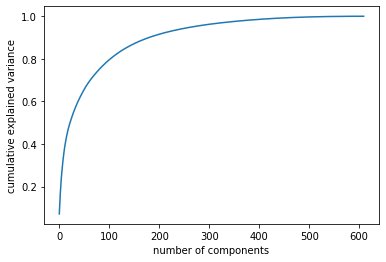

In [25]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [27]:
X_std

array([[-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
         5.84559005, -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       ...,
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [24.67792536, -0.04052204, -0.05735393, ...,  8.02741663,
        -0.2019994 , -0.04052204]])

In [29]:
# kindsonthegenius.com/2019/01/12/principal-components-analysispca-in-python-step-by-step/#t7

In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [36]:
telecom = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [61]:
features = telecom.columns.tolist()
features.remove("customerID")
features.remove("Churn")
print(features)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenuregroup']


In [54]:
# Feature Engineering

In [55]:
telecom_columns = telecom.columns.tolist()

#Munge data for few categorical columns to logically reduce the # of categories
## MultipleLines :  ['No phone service' 'No' 'Yes']  - Replace it outside the loop
## OnlineSecurity :  ['No' 'Yes' 'No internet service']
## OnlineBackup :  ['Yes' 'No' 'No internet service']
## DeviceProtection :  ['No' 'Yes' 'No internet service']
## TechSupport :  ['No' 'Yes' 'No internet service']
## StreamingTV :  ['No' 'Yes' 'No internet service']
## StreamingMovies :  ['No' 'Yes' 'No internet service']

munge_cols = ["OnlineSecurity", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", \
             "StreamingTV", "StreamingMovies"]

for cols in munge_cols:
    telecom[cols] = telecom[cols].replace({"No internet service" : "No"})
    
telecom["MultipleLines"] = telecom["MultipleLines"].replace({"No phone service": "No"})   

#Convert Tenure into categorical feature
def tenure_conversion(df):
    if df["tenure"] <= 12:
        return 0 #"1Yr_or_less"
    if (df["tenure"] > 12) & (df["tenure"] <= 24):
        return 1 #"1-2Yrs"
    if (df["tenure"] > 24) & (df["tenure"] <= 48):
        return 2 #"2-4Yrs"
    if (df["tenure"] > 48) & (df["tenure"] <= 60):
        return 3 #"4-5Yrs"
    if df["tenure"] > 60:
        return 4 #"5Yrs_or_more"

telecom["tenuregroup"] = telecom.apply(lambda x: tenure_conversion(x), axis=1)

# Seperate the categorical & Numerical columns

lists = []
cat_columns = []
num_columns = []

for col in telecom_columns:
    #print(col, " : ", telecom[col].nunique())
    record = [col, telecom[col].nunique()]
    lists.append(record)
    
unique_reccount = pd.DataFrame(lists, columns = ["column", "records"])

cat_columns = unique_reccount[unique_reccount["records"] <= 5]["column"]
cat_columns = [x for x in cat_columns if x not in ["customerID"] + ["Churn"]]
num_columns = [x for x in unique_reccount["column"] if x not in cat_columns + ["customerID"] + ["Churn"]]

# As a next step, could convert all categorical entries into 0 and 1 (numerical values) to enhance ML model performance
# Convert String values to numerical categorical codes to increase performance of PCA calculations

#gender
telecom["gender"] = telecom["gender"].replace({"Male" : 1, "Female": 0})
# Convert all Yes/No to 0 and 1

yesno_cols = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", \
             "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for cols in yesno_cols:
    telecom[cols] = telecom[cols].replace({"Yes": 1, "No": 0})
    
#InternetService
telecom["InternetService"].replace(to_replace = ['DSL', 'Fiber optic','No'], value =[1,2,0], inplace=True)

#Contract
telecom["Contract"].replace(to_replace = ['Month-to-month', 'One year', 'Two year'], value = [0,1,2], inplace=True)

#PaymentMethod
telecom["PaymentMethod"].replace(to_replace = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], value = [0,1,2,3], inplace=True )

In [62]:
telecom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenuregroup
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,29.85,29.85,0,1Yr_or_less
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,0,0,0,1,0,1,56.95,1889.5,0,2-4Yrs
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,1,1,53.85,108.15,1,1Yr_or_less
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,0,0,1,0,2,42.30,1840.75,0,2-4Yrs
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,1,0,70.70,151.65,1,1Yr_or_less


ValueError: could not convert string to float: 

In [66]:
#Convert Tenure into categorical feature
def tenure_conversion(df):
    if df["tenure"] <= 12:
        return 0 #"1Yr_or_less"
    if (df["tenure"] > 12) & (df["tenure"] <= 24):
        return 1 #"1-2Yrs"
    if (df["tenure"] > 24) & (df["tenure"] <= 48):
        return 2 #"2-4Yrs"
    if (df["tenure"] > 48) & (df["tenure"] <= 60):
        return 3 #"4-5Yrs"
    if df["tenure"] > 60:
        return 4 #"5Yrs_or_more"

telecom["tenuregroup"] = telecom.apply(lambda x: tenure_conversion(x), axis=1)

In [67]:
telecom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenuregroup
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,29.85,29.85,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,0,0,0,1,0,1,56.95,1889.5,0,2
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,1,1,53.85,108.15,1,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,0,0,1,0,2,42.30,1840.75,0,2
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,1,0,70.70,151.65,1,0


In [70]:
telecom.loc[:,"Churn"].values

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [72]:
# Try and use LabelEncoder

le = preprocessing.LabelEncoder()
telecom = telecom.apply(le.fit_transform)

In [73]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenuregroup
0,5375,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,142,2505,0,0
1,3962,1,0,0,0,34,1,0,1,1,...,0,0,0,1,0,1,498,1466,0,2
2,2564,1,0,0,0,2,1,0,1,1,...,0,0,0,0,1,1,436,157,1,0
3,5535,1,0,0,0,45,0,0,1,1,...,1,0,0,1,0,2,266,1400,0,2
4,6511,0,0,0,0,2,1,0,2,0,...,0,0,0,0,1,0,729,925,1,0


In [74]:
x = telecom.loc[:,features].values
y = telecom.loc[:,"Churn"].values

x = StandardScaler().fit_transform(x)

In [77]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)

In [78]:
principalComponents

array([[-2.2916733 , -0.5364597 ],
       [-0.85224272,  0.86522247],
       [-1.93182075, -0.84124786],
       ...,
       [-2.11241111,  0.40913631],
       [-1.16447909, -2.15677626],
       [ 3.5975908 ,  0.17108234]])

In [80]:
principaldf = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])

In [81]:
principaldf

,PC1,PC2
0,-2.291673,-0.536460
1,-0.852243,0.865222
2,-1.931821,-0.841248
3,-0.375988,1.852708
4,-2.428295,-2.033362
5,0.771386,-3.392175
6,0.314900,-1.049843
7,-2.710647,0.172997
8,2.115760,-2.078051
9,0.190109,2.402703


In [82]:
targetdf = telecom[["Churn"]]

In [83]:
newdf = pd.concat([principaldf, targetdf], axis = 1)

In [84]:
newdf.head()

,PC1,PC2,Churn
0,-2.291673,-0.536460,0
1,-0.852243,0.865222,0
2,-1.931821,-0.841248,1
3,-0.375988,1.852708,0
4,-2.428295,-2.033362,1


[24.18 15.01]


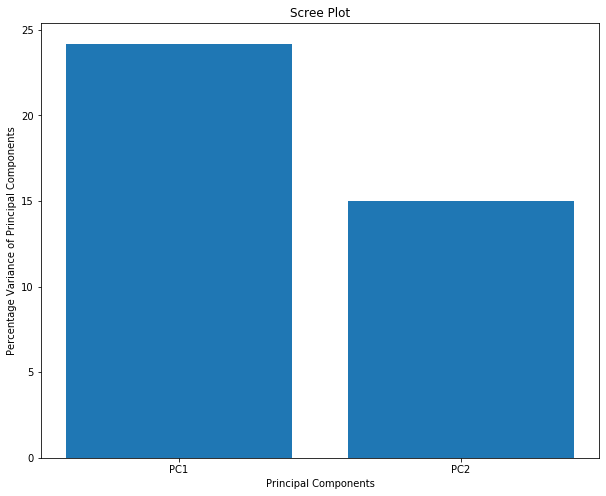

In [97]:

percent_var = np.round(pca.explained_variance_ratio_*100, decimals =2)
print(percent_var)
columns = ["PC1", "PC2"]

plt.subplots(figsize = (10,8))
plt.bar(x=range(1,3), height = percent_var, tick_label=columns)
plt.ylabel("Percentage Variance of Principal Components")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()

In [98]:
# Above does not show enough variance of data -> only 24.18+15.01% of overall 100% data. Need to find more

In [100]:
# Check with maximum components of 20 and work down based on Scree Plots
pca = PCA(n_components = 20)
principalComponents = pca.fit_transform(x)

In [107]:
columns = []
for i in range(1,21): #For PC1 to PC20
    columns.append("PC"+str(i))
    
principaldf = pd.DataFrame(data = principalComponents, columns = columns)

In [108]:
targetdf = telecom[["Churn"]]

newdf = pd.concat([principaldf, targetdf], axis = 1)

In [109]:
newdf.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Churn
0,-2.291632,-0.537383,2.083053,-1.086343,1.704889,1.424623,-0.152202,0.970603,-0.847069,-1.513372,...,-0.159014,-0.087523,0.904599,1.038190,-0.132770,-0.959239,0.602860,0.100581,0.108170,0
1,-0.852215,0.866521,0.844747,1.025086,-0.565624,-1.117373,1.005767,-0.184239,1.196015,-0.144946,...,-1.412674,-1.267084,-1.118482,-0.111773,-0.111757,0.336135,0.106261,0.057479,-0.018171,0
2,-1.931431,-0.842129,1.067697,0.297602,-0.200729,-0.748520,2.390665,1.014544,-0.833193,-0.752740,...,-0.407991,0.186952,-1.355948,-0.362322,0.179292,-0.899653,0.117099,0.038085,-0.082714,1
3,-0.376253,1.852783,3.677113,1.121610,0.490492,-0.938711,0.893418,-0.061026,0.650665,0.233284,...,-0.781891,-0.843295,1.244230,0.203435,-0.259860,0.781632,0.114828,-0.258368,0.074615,0
4,-2.428219,-2.033948,0.054919,-0.076442,-0.317592,0.997968,0.771530,-0.449431,-0.607809,-0.600764,...,0.088456,-0.396580,-0.566997,0.387306,-0.064589,0.836044,0.692500,0.021339,-0.008235,1


[24.18 15.01  7.    5.9   5.27  5.    4.46  4.33  4.11  3.76  3.44  3.17
  3.01  2.89  2.41  2.32  2.13  1.49  0.09  0.03]


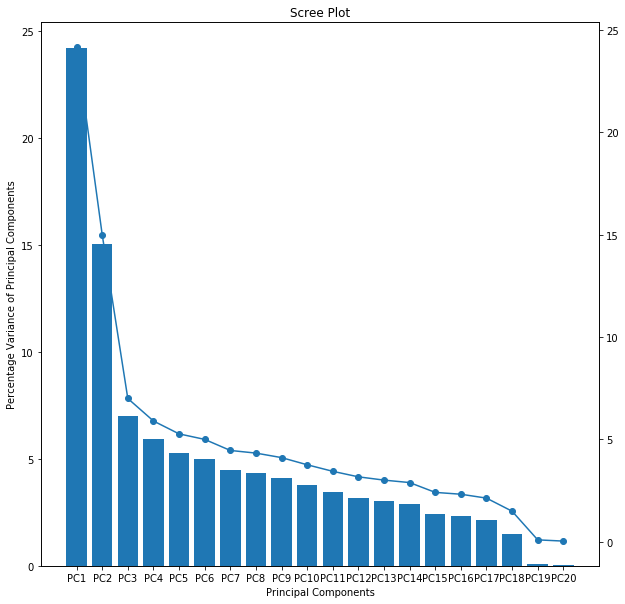

In [137]:

percent_var = np.round(pca.explained_variance_ratio_*100, decimals =2)
print(percent_var)
columns = columns

fig, ax = plt.subplots(figsize = (10,10))
ax1 = plt.bar(x=range(1,21), height = percent_var, tick_label=columns)
plt.ylabel("Percentage Variance of Principal Components")
plt.xlabel("Principal Components")

ax2 = ax.twinx()
#plt.line(ax.get_xticks(), percent_var, linestyle="-", marker="o")
lineplotdf = pd.DataFrame(percent_var)
ax2.plot(ax.get_xticks(), lineplotdf, linestyle="-", marker="o")

plt.title("Scree Plot")
plt.show()

In [139]:
24.18+15.01+7+5.9+5.27+5+4.46+4.33+4.11

75.25999999999999

In [1]:
#Try 2
# Check with maximum components of 10 and work down based on Scree Plots
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(x)

columns = []
for i in range(1,21): #For PC1 to PC20
    columns.append("PC"+str(i))
    
principaldf = pd.DataFrame(data = principalComponents, columns = columns)

targetdf = telecom[["Churn"]]

newdf = pd.concat([principaldf, targetdf], axis = 1)


percent_var = np.round(pca.explained_variance_ratio_*100, decimals =2)
print(percent_var)
columns = columns

fig, ax = plt.subplots(figsize = (10,10))
ax1 = plt.bar(x=range(1,21), height = percent_var, tick_label=columns)
plt.ylabel("Percentage Variance of Principal Components")
plt.xlabel("Principal Components")

ax2 = ax.twinx()
#plt.line(ax.get_xticks(), percent_var, linestyle="-", marker="o")
lineplotdf = pd.DataFrame(percent_var)
ax2.plot(ax.get_xticks(), lineplotdf, linestyle="-", marker="o")

plt.title("Scree Plot")
plt.show()

NameError: name 'PCA' is not defined